In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

First task: Apply k-means to the Iris dataset and see what happens when you change the value of k. Which solution is most compelling?  

In [0]:
#load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarize features (bc k-means is sensitive to the scale of the data)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Set different k values

cluster_numbers = [2, 3, 4, 5]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

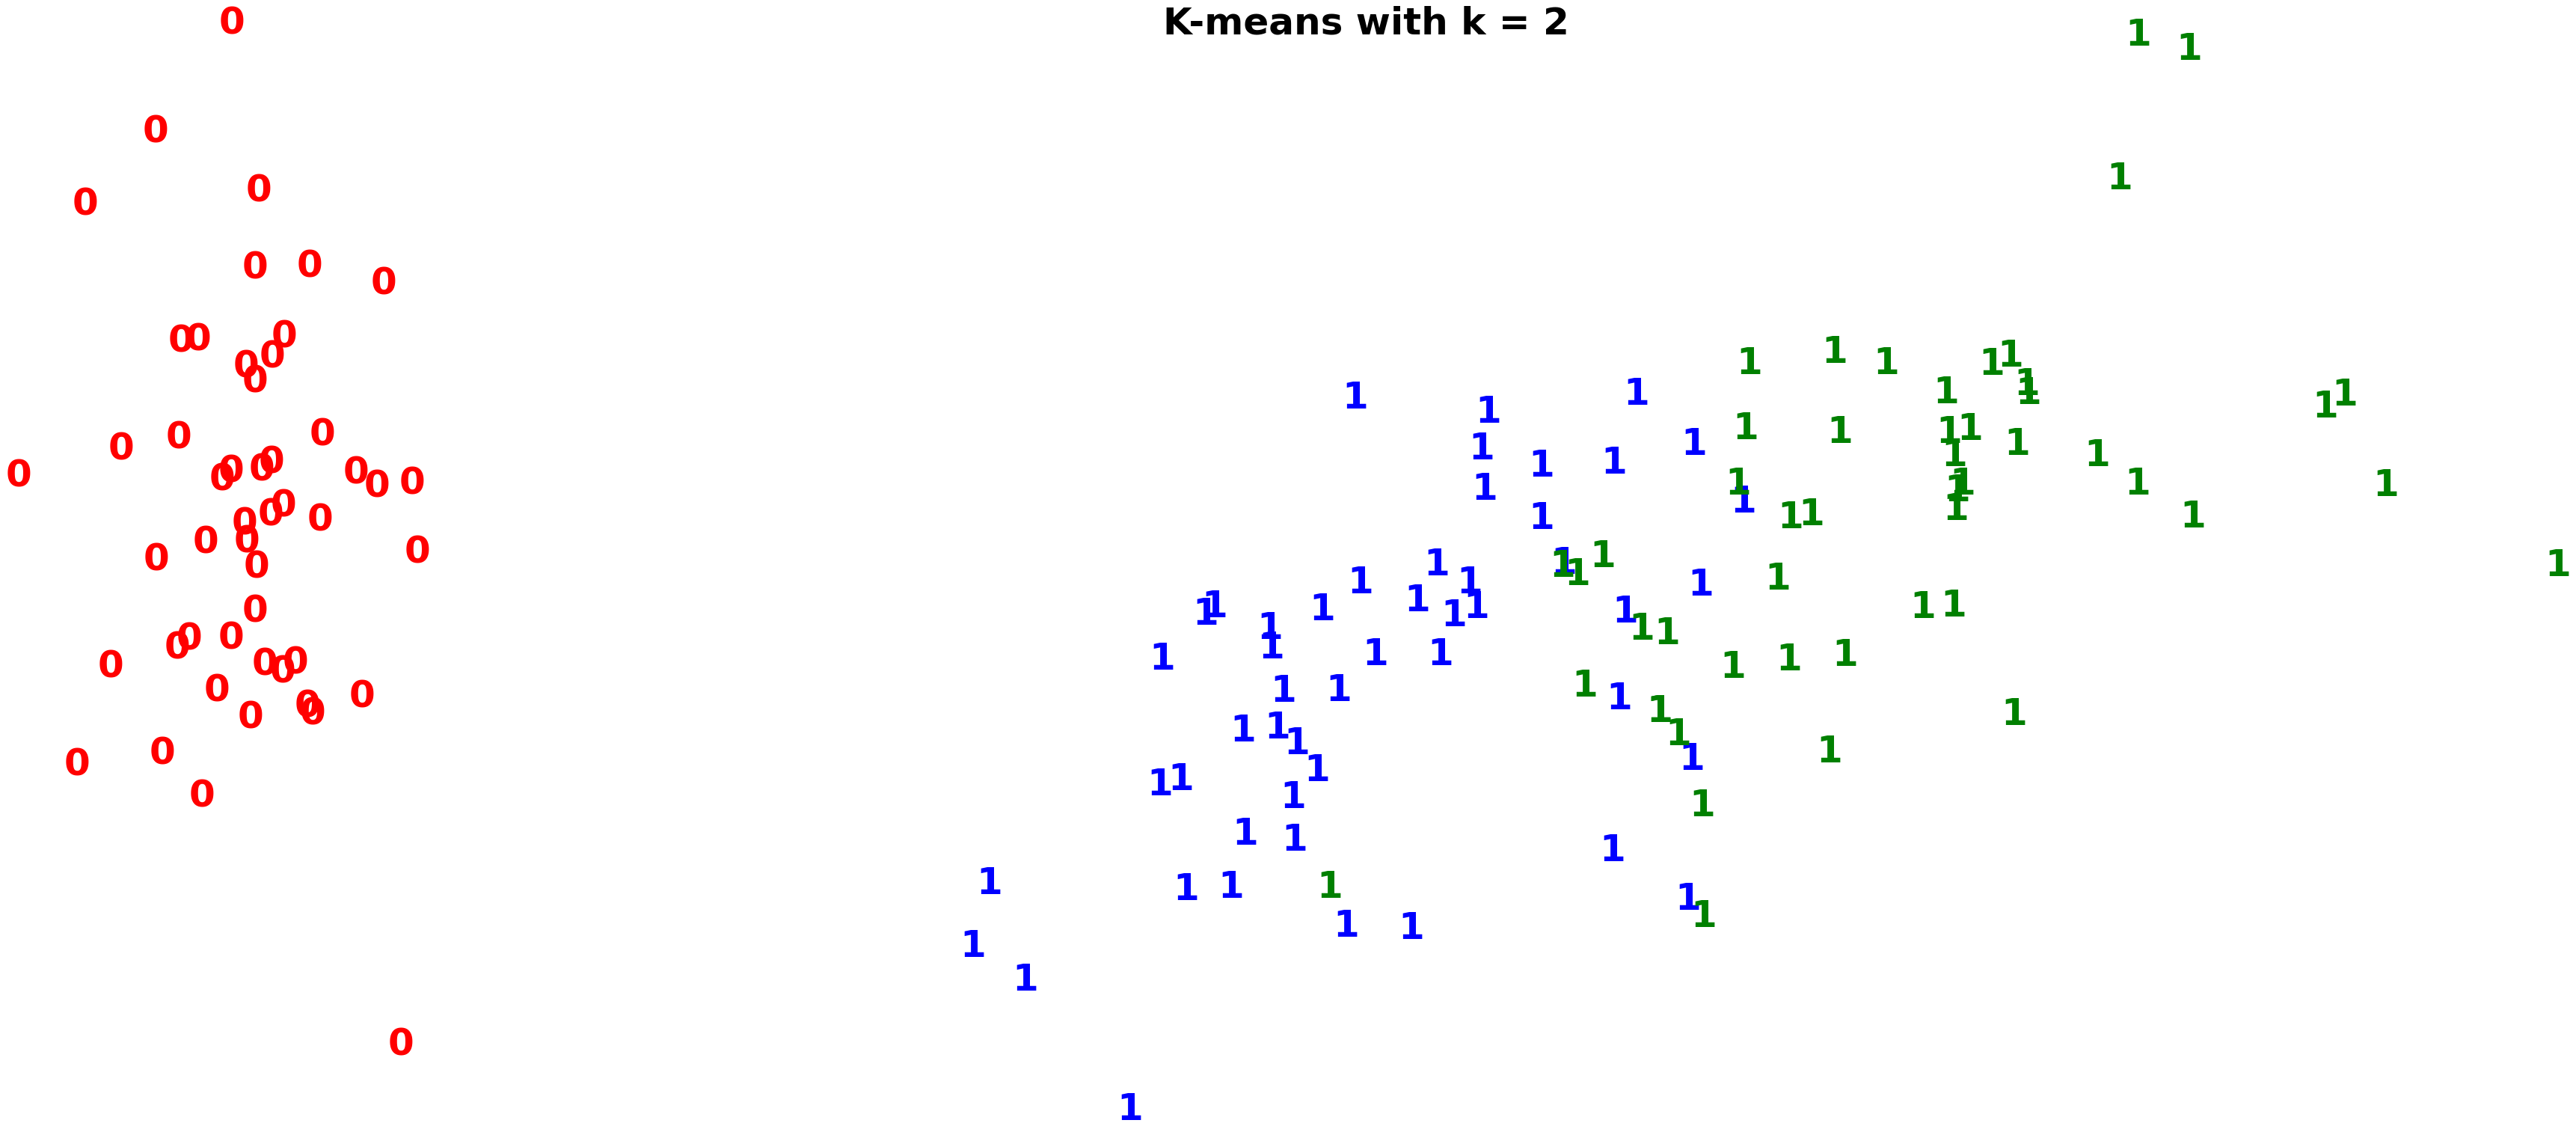

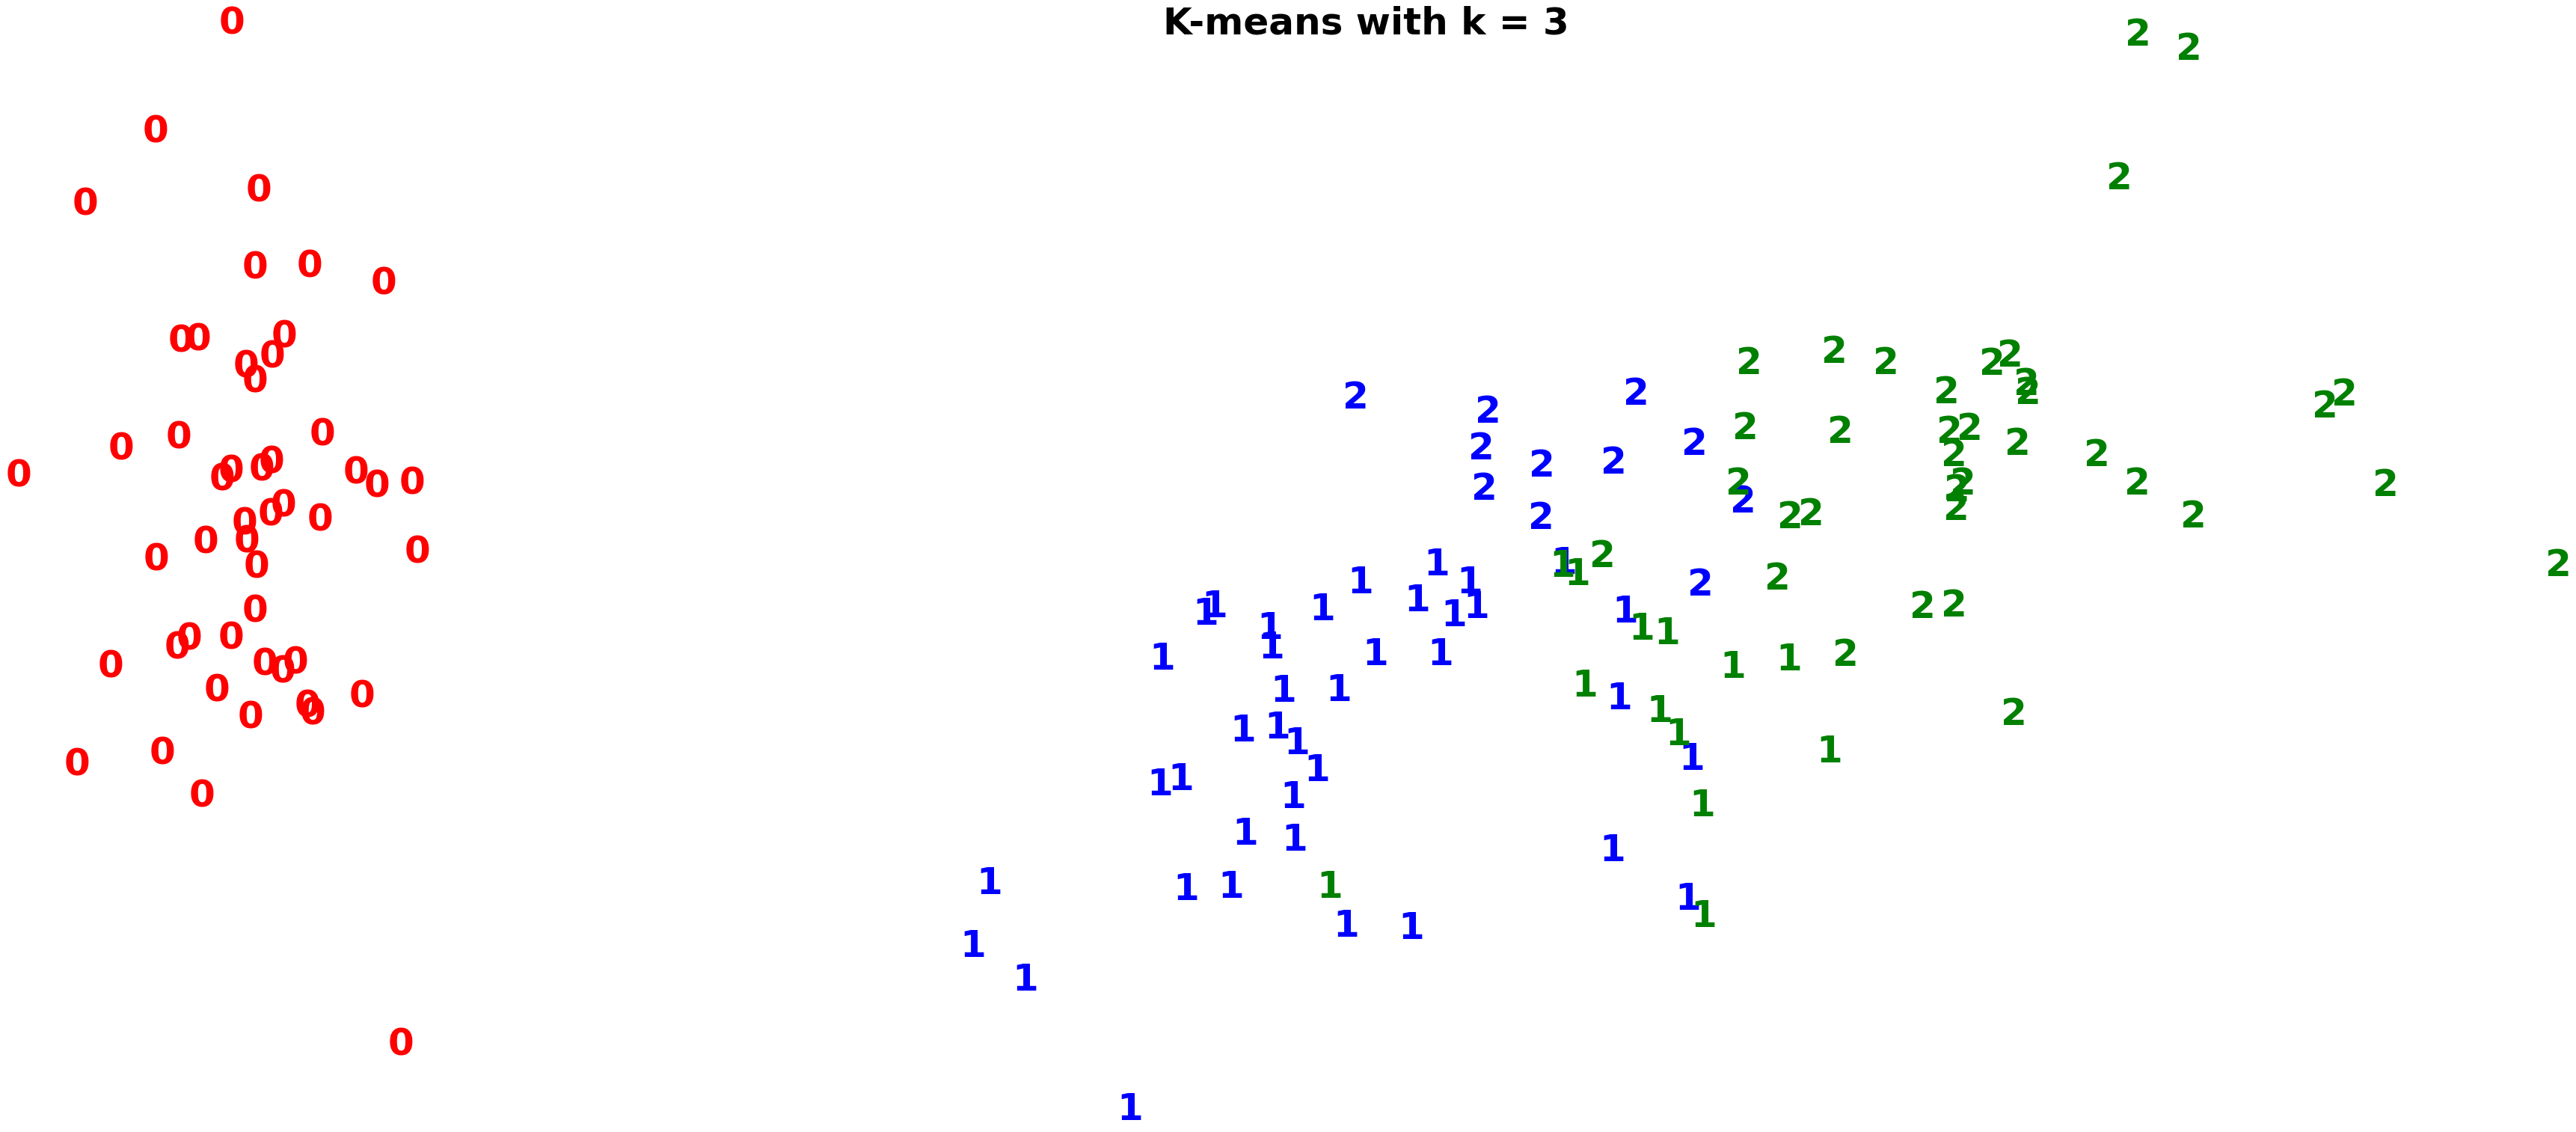

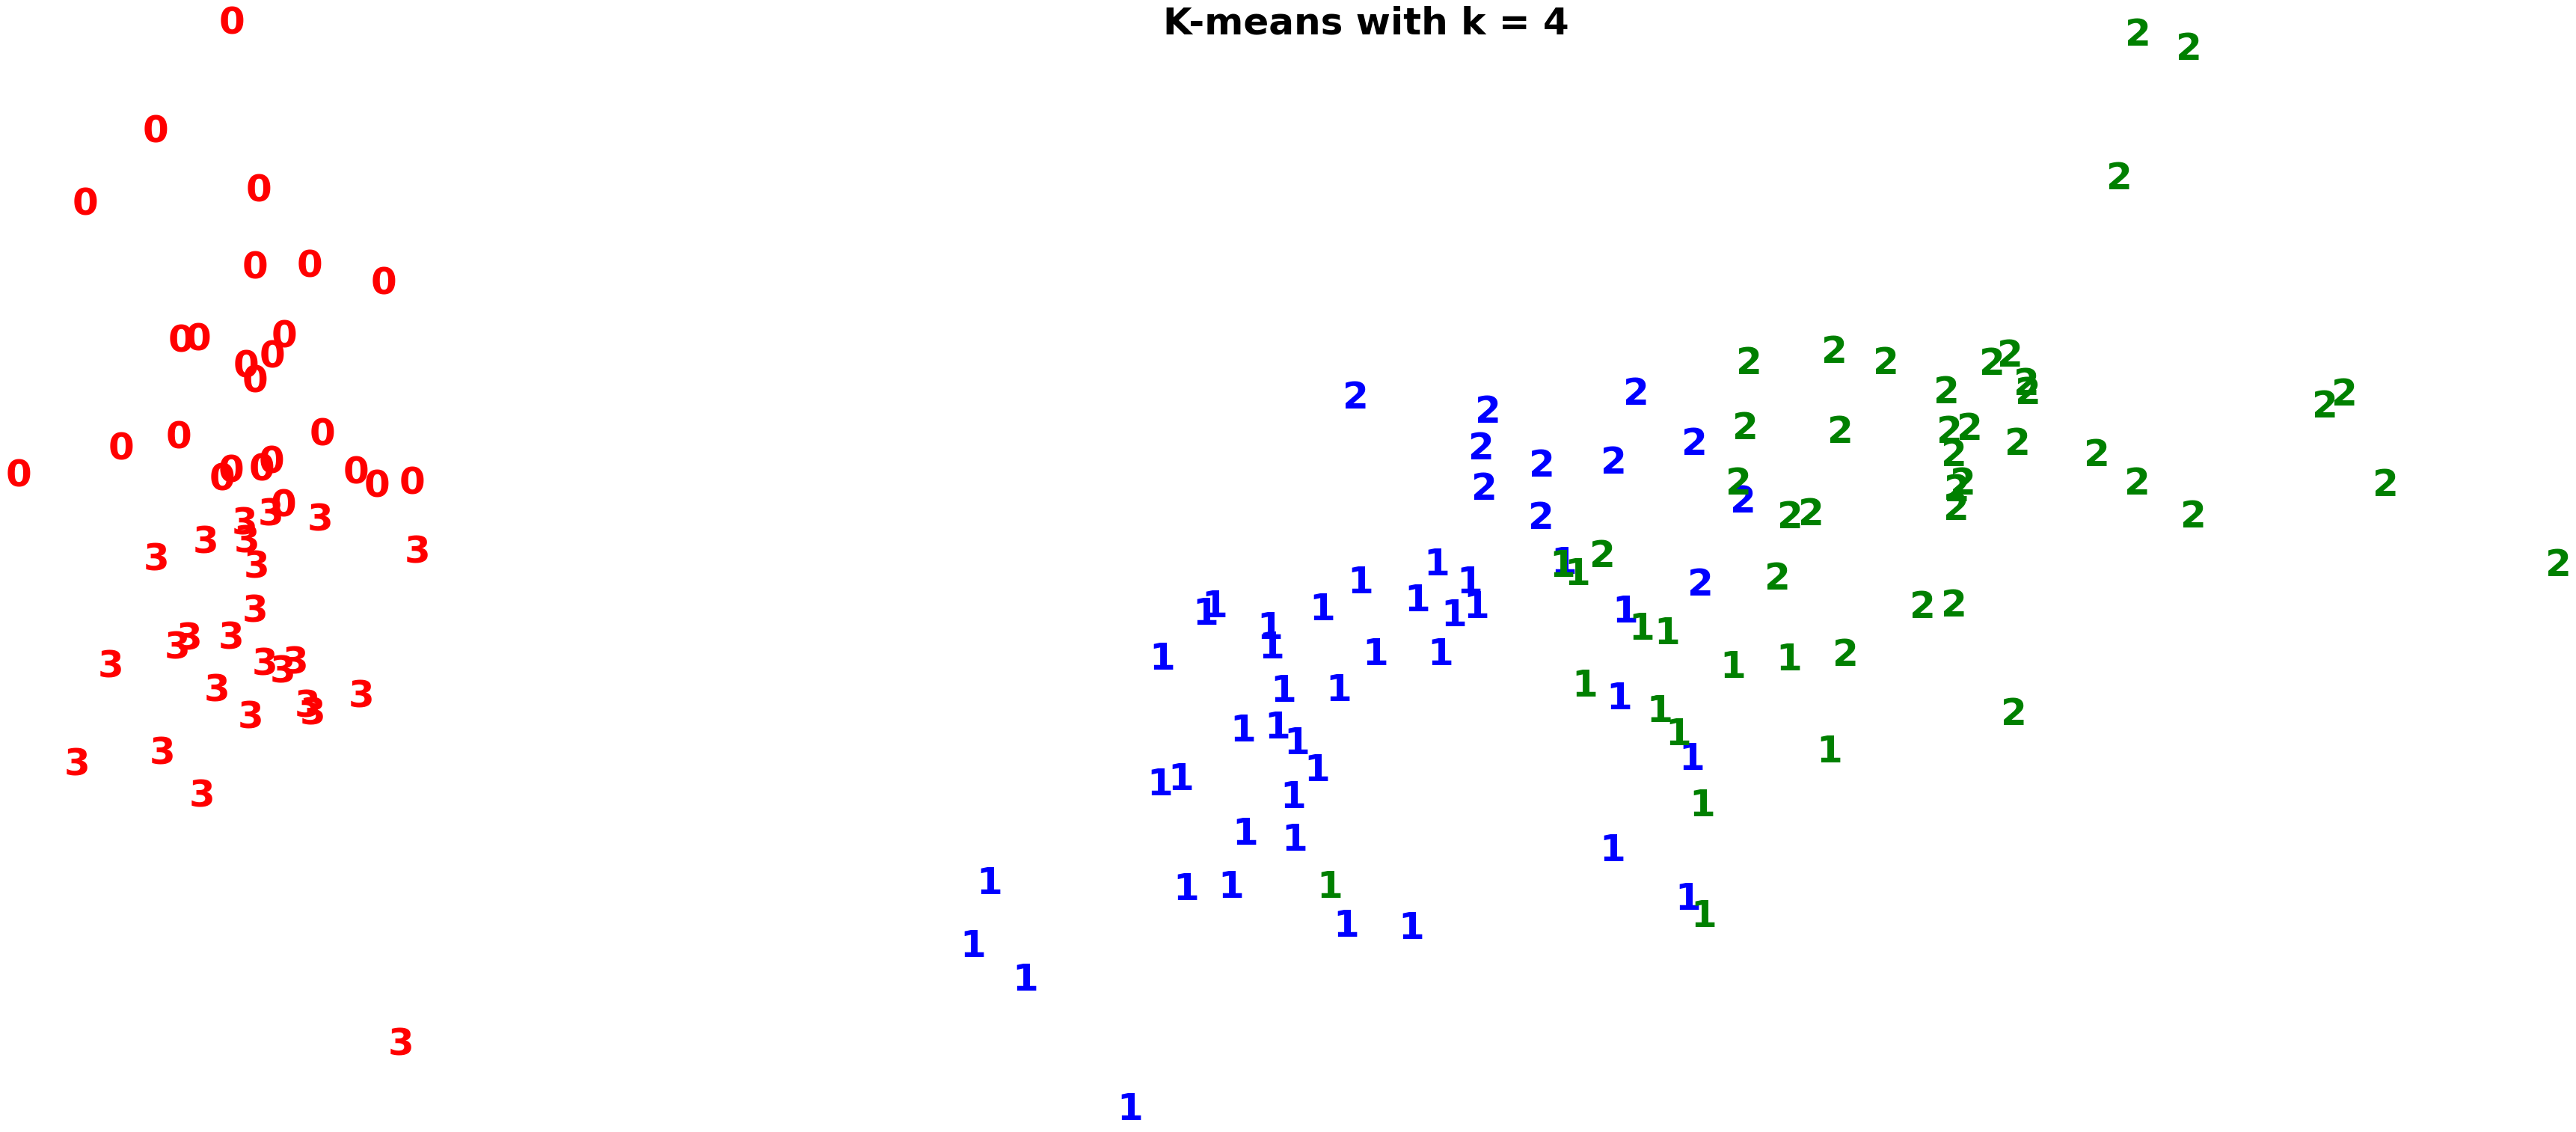

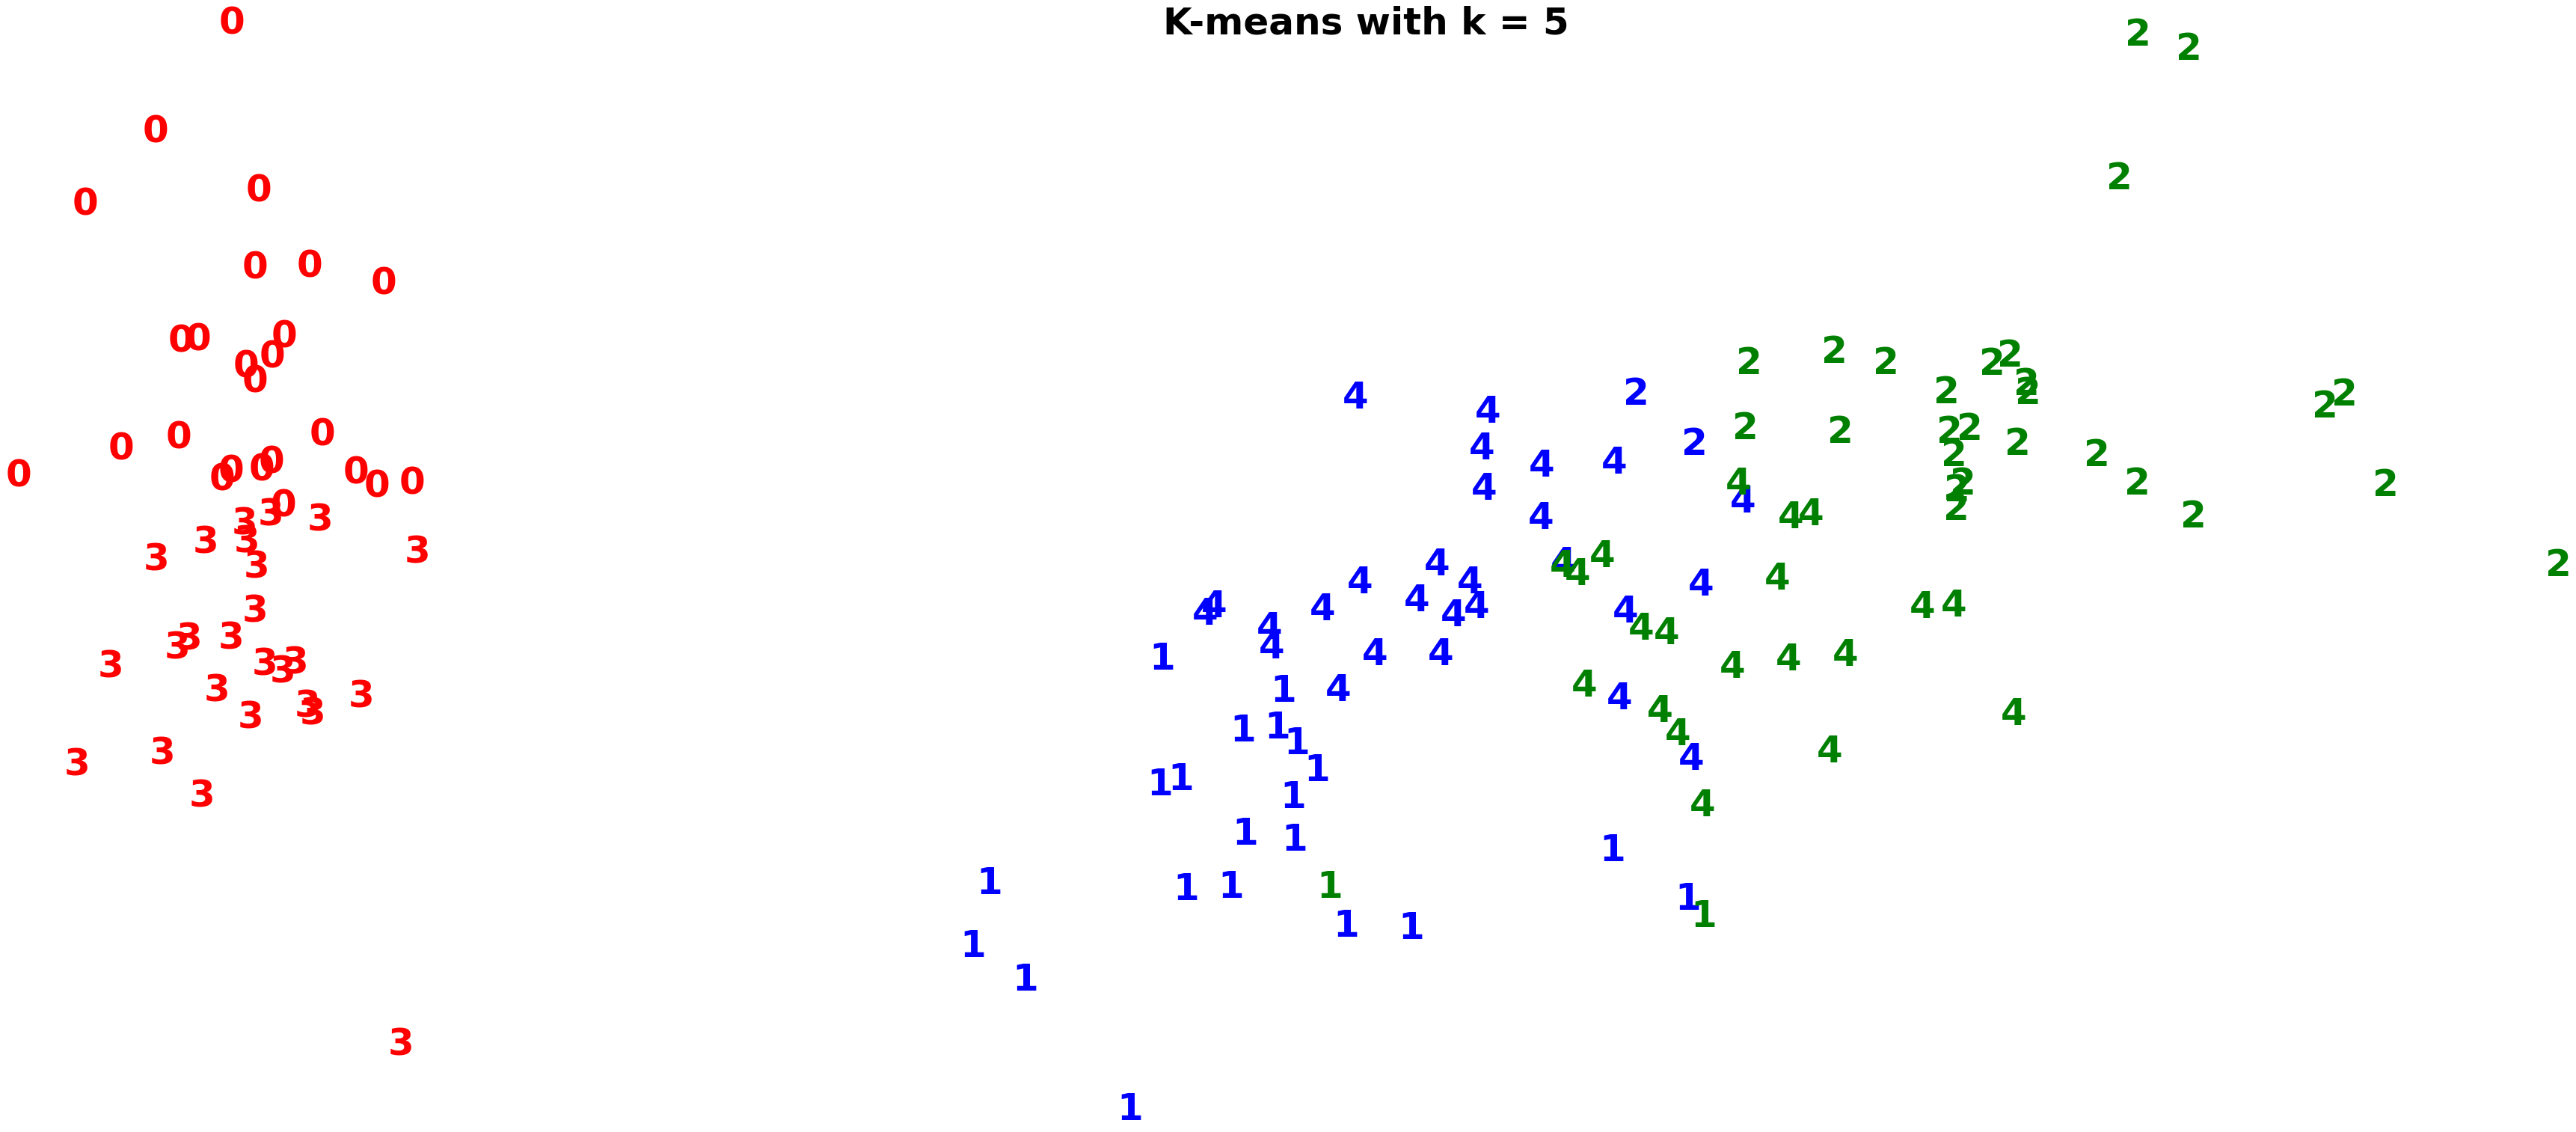

In [4]:
#Apply PCA

pca = PCA(n_components=2).fit_transform(X_std)

#plot the different solutions
colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

The k=2 and k=3 solutions are certainly better than the k=4 or 5 solutions. The k=2 and k=3 solutions had one cluster for the linearly separable case, while the k=4 and 5 solutions included more than 1 class to that cluster. In addition, when k=2, the non linearly separable classes only had one cluster, whereas the k=2 solutions separated these classes into 2 clusters. Based on the above plots, k=3 seems to be the best choice.

Second Task  

Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [0]:
#load data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)


engine.dispose()

In [0]:
# Define the features and target
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

#convert y to binary feature (1=heart disease, 0 = no heart disease)
y = np.where(y > 0, 0, 1)

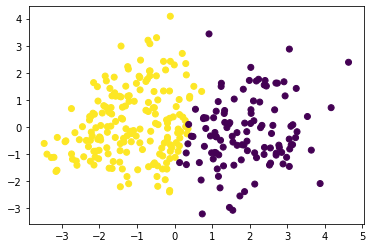

Compare k-means clusters against the data
col_0    0    1
row_0          
0      101   13
1       38  151


In [9]:
# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# apply PCA
X_pca = PCA(2).fit_transform(X_std)

# Get predictions
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Compare the solution to the data
print('Compare k-means clusters against the data')
print(pd.crosstab(y_pred, y))

This solution is not perfect, but it did pretty well. It correctly classified 252 cases. Even though the algorithm was blind to whether the patients had heart disease or did not, the clusters it created seem to mostly correctly classify the patients into these two clusters. This tells me that k means performed well. 
